In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [97]:
# Load the dataset
df = pd.read_csv(r"C:\Users\chojk\Desktop\myproject\SleepHealtLifestyleDatasetPredictiveModelling\Sleep_health_and_lifestyle_dataset.csv")

In [98]:
# Imputes the mean of a specified column onto null values within the column
def imputeNullValues(colName, df):
    print("Imputing " + colName + ".")
    # Create two new column names based on original column name.
    indicatorColName = 'm_'   + colName # Tracks whether imputed.
    imputedColName   = 'imp_' + colName # Stores original & imputed data.

    # Get mean or median depending on preference.
    imputedValue = df[colName].mean()

    # Populate new columns with data.
    imputedColumn  = []
    indictorColumn = []
    for i in range(len(df)):
        isImputed = False

        # mi_OriginalName column stores imputed & original data.
        if np.isnan(df.loc[i][colName]):
            isImputed = True
            imputedColumn.append(imputedValue)
        else:
            imputedColumn.append(df.loc[i][colName])

        # mi_OriginalName column tracks if is imputed (1) or not (0).
        if isImputed:
            indictorColumn.append(1)
        else:
            indictorColumn.append(0)

    # Append new columns to dataframe but always keep original column.
    df[indicatorColName] = indictorColumn
    df[imputedColName]   = imputedColumn
    del df[colName]     # Drop column with null values.
    return df

def prepDataFeatures(df):
    print("Prepping features.")
    # Copy the DataFrame and drop the target variable
    X = df.copy()
    X = X.drop('Person ID', axis=1)
    
    # Devide 'Blood Pressure' column into HighBP and LowBP
    X[['HighBP', 'LowBP']] = X['Blood Pressure'].str.split('/', expand=True)
    X = X.drop(columns=['Blood Pressure'])
    
    # Convert "Normal Weight" to "Normal" in the 'BMI Category' column
    X['BMI Category'] = X['BMI Category'].replace('Normal Weight', 'Normal')
    
    # Convert both 'HighBP' and 'LowBP' to integers
    X['HighBP'] = pd.to_numeric(X['HighBP'], errors='coerce', downcast='integer')
    X['LowBP'] = pd.to_numeric(X['LowBP'], errors='coerce', downcast='integer')
    
    # Make dummy variables
    X = pd.get_dummies(X, columns=['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], dtype=int)
    
    # Set Model variables
    X = X[['Sleep Duration', 'Stress Level', 'Age',
        'Occupation_Engineer', 'BMI Category_Normal', 'Gender_Female',
        'Physical Activity Level', 'Occupation_Scientist', 'Occupation_Sales Representative',
        'Occupation_Doctor', 'BMI Category_Overweight', 'Gender_Male', 'Sleep Disorder_Insomnia',
        'Occupation_Salesperson']]
    
    
    y = df['Quality of Sleep']
    
    return X, y

In [99]:
def performModelTraining(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Display evaluation summary
    print("\n**** Evaluation Summary ****")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    return y_test, y_pred

In [100]:
def plotActualVsPredicted(y_test, y_pred):
    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
    
    # Set plot labels and title
    plt.xlabel("Actual Quality of Sleep")
    plt.ylabel("Predicted Quality of Sleep")
    plt.title("Actual vs. Predicted Quality of Sleep")
    plt.legend()
    plt.show()

In [101]:
# Prepare features and target variable
X, y = prepDataFeatures(df)

Prepping features.


In [102]:
# Train the model and evaluate
y_test, y_pred = performModelTraining(X, y)


**** Evaluation Summary ****
Mean Absolute Error (MAE): 0.0297
Mean Squared Error (MSE): 0.0113
R² Score: 0.9908


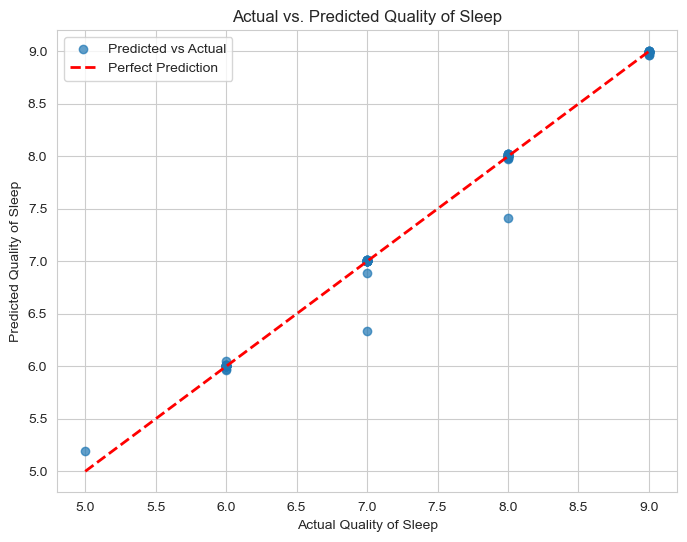

In [103]:
# Visualize the results
plotActualVsPredicted(y_test, y_pred)